In [1]:
import os
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

import sagemaker
from sagemaker import get_execution_role
import sagemaker_pyspark
import boto3

role = get_execution_role()

# Configure Spark to use the SageMaker Spark dependency jars
jars = sagemaker_pyspark.classpath_jars()

classpath = ":".join(sagemaker_pyspark.classpath_jars())

# See the SageMaker Spark Github repo under sagemaker-pyspark-sdk
# to learn how to connect to a remote EMR cluster running Spark from a Notebook Instance.
spark = SparkSession.builder.config("spark.driver.extraClassPath", classpath).getOrCreate()
#spark = SparkSession.builder.config("spark.driver.extraClassPath", classpath).master("local[*]").getOrCreate()

import pandas as pd
import numpy as np
import re
import sys
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn import Embedding


In [2]:
path = 's3a://fetch-data-puddle/spark/sandbox/mingjun/'

#train = spark.read.csv(path + 'ORtrainCSV', header=True).toPandas()

#test = spark.read.csv(path + 'ORtestCSV', header=True).toPandas()
#display(train.columns)

#other = spark.read.csv(path + 'ORotherCSV', header=True).toPandas()
#display(train.columns)


In [3]:
col_offers = ['offer_id','cat_brand_sums[0]', 'cat_brand_sums[1]', 'cat_brand_sums[2]', 'cat_brand_sums[3]', 'cat_brand_sums[4]', 'cat_brand_sums[5]', 'cat_brand_sums[6]', 'cat_brand_sums[7]', 'cat_brand_sums[8]', 'cat_brand_sums[9]', 'cat_brand_sums[10]', 'cat_brand_sums[11]', 'cat_brand_sums[12]', 'cat_brand_sums[13]', 'cat_brand_sums[14]', 'cat_brand_sums[15]', 'cat_brand_sums[16]', 'cat_brand_sums[17]', 'cat_brand_sums[18]', 'cat_brand_sums[19]', 'cat_brand_sums[20]', 'cat_brand_sums[21]', 'cat_brand_sums[22]', 'cat_brand_sums[23]', 'cat_brand_sums[24]', 'cat_brand_sums[25]', 'cat_brand_sums[26]', 'cat_brand_sums[27]', 'cat_brand_sums[28]', 'cat_brand_sums[29]', 'cat_brand_sums[30]', 'cat_brand_sums[31]', 'cat_brand_sums[32]', 'cat_brand_sums[33]', 'cat_brand_sums[34]', 'cat_brand_sums[35]', 'cat_brand_sums[36]', 'cat_brand_sums[37]', 'cat_brand_sums[38]', 'cat_brand_sums[39]', 'cat_brand_sums[40]', 'cat_brand_sums[41]', 'cat_brand_sums[42]', 'cat_brand_sums[43]', 'cat_brand_sums[44]', 'cat_brand_sums[45]', 'cat_brand_sums[46]', 'cat_brand_sums[47]', 'cat_brand_sums[48]', 'cat_brand_sums[49]', 'cat_brand_sums[50]', 'cat_brand_sums[51]', 'cat_brand_sums[52]', 'cat_brand_sums[53]', 'cat_brand_sums[54]', 'cat_brand_sums[55]', 'cat_brand_sums[56]', 'cat_brand_sums[57]', 'cat_brand_sums[58]', 'cat_brand_sums[59]', 'cat_brand_sums[60]', 'cat_brand_sums[61]', 'cat_brand_sums[62]', 'cat_brand_sums[63]', 'cat_brand_sums[64]', 'cat_brand_sums[65]', 'cat_brand_sums[66]', 'cat_brand_sums[67]', 'cat_brand_sums[68]', 'cat_brand_sums[69]', 'cat_brand_sums[70]', 'cat_brand_sums[71]', 'cat_brand_sums[72]', 'cat_brand_sums[73]', 'cat_brand_sums[74]', 'cat_brand_sums[75]', 'cat_brand_sums[76]', 'cat_brand_sums[77]', 'cat_brand_sums[78]', 'cat_brand_sums[79]', 'cat_brand_sums[80]', 'cat_brand_sums[81]', 'cat_brand_sums[82]', 'cat_brand_sums[83]', 'cat_brand_sums[84]', 'cat_brand_sums[85]', 'cat_brand_sums[86]', 'cat_brand_sums[87]', 'cat_brand_sums[88]', 'cat_brand_sums[89]', 'cat_brand_sums[90]', 'cat_brand_sums[91]', 'cat_brand_sums[92]', 'cat_brand_sums[93]', 'cat_brand_sums[94]', 'cat_brand_sums[95]', 'cat_brand_sums[96]', 'cat_brand_sums[97]', 'cat_brand_sums[98]', 'cat_brand_sums[99]', 'cat_brand_sums[100]', 'cat_brand_sums[101]', 'cat_brand_sums[102]', 'cat_brand_sums[103]', 'cat_brand_sums[104]', 'cat_brand_sums[105]', 'cat_brand_sums[106]', 'cat_brand_sums[107]', 'cat_brand_sums[108]', 'cat_brand_sums[109]', 'cat_brand_sums[110]', 'cat_brand_sums[111]', 'cat_brand_sums[112]', 'cat_brand_sums[113]', 'cat_brand_sums[114]', 'cat_brand_sums[115]', 'cat_brand_sums[116]', 'cat_brand_sums[117]', 'cat_brand_sums[118]', 'cat_brand_sums[119]', 'cat_brand_sums[120]', 'cat_brand_sums[121]', 'cat_brand_sums[122]', 'cat_brand_sums[123]', 'cat_brand_sums[124]', 'cat_brand_sums[125]', 'cat_brand_sums[126]', 'cat_brand_sums[127]', 'cat_brand_sums[128]', 'cat_brand_sums[129]', 'cat_brand_sums[130]', 'cat_brand_sums[131]', 'cat_brand_sums[132]', 'cat_brand_sums[133]', 'cat_brand_sums[134]', 'cat_brand_sums[135]', 'cat_brand_sums[136]', 'cat_brand_sums[137]', 'cat_brand_sums[138]', 'cat_brand_sums[139]', 'cat_brand_sums[140]', 'cat_brand_sums[141]', 'cat_brand_sums[142]', 'cat_brand_sums[143]', 'cat_brand_sums[144]', 'cat_brand_sums[145]', 'cat_brand_sums[146]', 'cat_brand_sums[147]', 'cat_brand_sums[148]', 'cat_brand_sums[149]', 'cat_brand_sums[150]', 'cat_brand_sums[151]', 'cat_brand_sums[152]', 'cat_brand_sums[153]', 'cat_brand_sums[154]', 'cat_brand_sums[155]', 'cat_brand_sums[156]', 'cat_brand_sums[157]', 'cat_brand_sums[158]', 'cat_brand_sums[159]', 'cat_brand_sums[160]', 'cat_brand_sums[161]', 'cat_brand_sums[162]', 'cat_brand_sums[163]', 'cat_brand_sums[164]', 'cat_brand_sums[165]', 'cat_brand_sums[166]', 'cat_brand_sums[167]', 'cat_brand_sums[168]', 'cat_brand_sums[169]', 'cat_brand_sums[170]', 'cat_brand_sums[171]', 'cat_brand_sums[172]', 'cat_brand_sums[173]', 'cat_brand_sums[174]', 'cat_brand_sums[175]', 'cat_brand_sums[176]', 'cat_brand_sums[177]', 'cat_brand_sums[178]', 'cat_brand_sums[179]', 'cat_brand_sums[180]', 'cat_brand_sums[181]', 'cat_brand_sums[182]', 'cat_brand_sums[183]', 'cat_brand_sums[184]', 'cat_brand_sums[185]', 'cat_brand_sums[186]', 'cat_brand_sums[187]', 'cat_brand_sums[188]', 'cat_brand_sums[189]', 'cat_brand_sums[190]', 'cat_brand_sums[191]', 'cat_brand_sums[192]', 'cat_brand_sums[193]', 'cat_brand_sums[194]', 'cat_brand_sums[195]', 'cat_brand_sums[196]', 'cat_brand_sums[197]', 'cat_brand_sums[198]', 'cat_brand_sums[199]', 'cat_brand_sums[200]', 'cat_brand_sums[201]', 'cat_brand_sums[202]', 'cat_brand_sums[203]', 'cat_brand_sums[204]', 'cat_brand_sums[205]', 'cat_brand_sums[206]', 'cat_brand_sums[207]', 'cat_brand_sums[208]', 'cat_brand_sums[209]', 'cat_brand_sums[210]', 'cat_brand_sums[211]', 'cat_brand_sums[212]', 'cat_brand_sums[213]', 'cat_brand_sums[214]', 'cat_brand_sums[215]', 'cat_brand_sums[216]', 'cat_brand_sums[217]', 'cat_brand_sums[218]', 'cat_brand_sums[219]', 'cat_brand_sums[220]', 'cat_brand_sums[221]', 'cat_brand_sums[222]', 'cat_brand_sums[223]', 'cat_brand_sums[224]', 'cat_brand_sums[225]', 'cat_brand_sums[226]', 'cat_brand_sums[227]', 'cat_brand_sums[228]', 'cat_brand_sums[229]', 'cat_brand_sums[230]', 'cat_brand_sums[231]', 'cat_brand_sums[232]', 'cat_brand_sums[233]', 'cat_brand_sums[234]', 'cat_brand_sums[235]', 'cat_brand_sums[236]', 'cat_brand_sums[237]', 'cat_brand_sums[238]', 'cat_brand_sums[239]', 'cat_brand_sums[240]', 'cat_brand_sums[241]', 'cat_brand_sums[242]', 'cat_brand_sums[243]', 'cat_brand_sums[244]', 'cat_brand_sums[245]', 'cat_brand_sums[246]', 'cat_brand_sums[247]', 'cat_brand_sums[248]', 'cat_brand_sums[249]', 'cat_brand_sums[250]', 'cat_brand_sums[251]', 'cat_brand_sums[252]', 'cat_brand_sums[253]', 'cat_brand_sums[254]', 'cat_brand_sums[255]', 'cat_brand_sums[256]', 'cat_brand_sums[257]', 'cat_brand_sums[258]', 'cat_brand_sums[259]', 'cat_brand_sums[260]', 'cat_brand_sums[261]', 'cat_brand_sums[262]', 'cat_brand_sums[263]', 'cat_brand_sums[264]', 'cat_brand_sums[265]', 'cat_brand_sums[266]', 'cat_brand_sums[267]', 'cat_brand_sums[268]', 'cat_brand_sums[269]', 'cat_brand_sums[270]', 'cat_brand_sums[271]', 'cat_brand_sums[272]', 'cat_brand_sums[273]', 'cat_brand_sums[274]', 'cat_brand_sums[275]', 'cat_brand_sums[276]', 'cat_brand_sums[277]', 'cat_brand_sums[278]', 'cat_brand_sums[279]', 'cat_brand_sums[280]', 'cat_brand_sums[281]', 'cat_brand_sums[282]', 'cat_brand_sums[283]', 'cat_brand_sums[284]', 'cat_brand_sums[285]', 'cat_brand_sums[286]', 'cat_brand_sums[287]', 'cat_brand_sums[288]', 'cat_brand_sums[289]', 'cat_brand_sums[290]', 'cat_brand_sums[291]', 'cat_brand_sums[292]', 'cat_brand_sums[293]', 'cat_brand_sums[294]', 'cat_brand_sums[295]', 'cat_brand_sums[296]', 'cat_brand_sums[297]', 'cat_brand_sums[298]', 'cat_brand_sums[299]', 'cat_brand_sums[300]', 'cat_brand_sums[301]', 'cat_brand_sums[302]', 'cat_brand_sums[303]', 'cat_brand_sums[304]', 'cat_brand_sums[305]', 'cat_brand_sums[306]', 'cat_brand_sums[307]', 'cat_brand_sums[308]', 'cat_brand_sums[309]', 'cat_brand_sums[310]', 'cat_brand_sums[311]', 'cat_brand_sums[312]', 'cat_brand_sums[313]', 'cat_brand_sums[314]', 'cat_brand_sums[315]', 'cat_brand_sums[316]', 'cat_brand_sums[317]', 'cat_brand_sums[318]', 'cat_brand_sums[319]', 'cat_brand_sums[320]', 'cat_brand_sums[321]', 'cat_brand_sums[322]', 'cat_brand_sums[323]', 'cat_brand_sums[324]', 'cat_brand_sums[325]', 'cat_brand_sums[326]', 'cat_brand_sums[327]', 'cat_brand_sums[328]', 'cat_brand_sums[329]', 'cat_brand_sums[330]', 'cat_brand_sums[331]', 'cat_brand_sums[332]', 'cat_brand_sums[333]', 'cat_brand_sums[334]', 'cat_brand_sums[335]', 'cat_brand_sums[336]', 'cat_brand_sums[337]', 'cat_brand_sums[338]', 'cat_brand_sums[339]', 'cat_brand_sums[340]', 'cat_brand_sums[341]', 'cat_brand_sums[342]', 'cat_brand_sums[343]', 'cat_brand_sums[344]', 'cat_brand_sums[345]', 'cat_brand_sums[346]', 'cat_brand_sums[347]', 'cat_brand_sums[348]', 'cat_brand_sums[349]', 'cat_brand_sums[350]', 'cat_brand_sums[351]', 'cat_brand_sums[352]', 'cat_brand_sums[353]', 'cat_brand_sums[354]', 'cat_brand_sums[355]', 'cat_brand_sums[356]', 'cat_brand_sums[357]', 'cat_brand_sums[358]', 'cat_brand_sums[359]', 'cat_brand_sums[360]', 'cat_brand_sums[361]', 'cat_brand_sums[362]', 'cat_brand_sums[363]', 'cat_brand_sums[364]', 'cat_brand_sums[365]', 'cat_brand_sums[366]', 'cat_brand_sums[367]', 'cat_brand_sums[368]', 'cat_brand_sums[369]', 'cat_brand_sums[370]', 'cat_brand_sums[371]', 'cat_brand_sums[372]', 'cat_brand_sums[373]', 'cat_brand_sums[374]', 'cat_brand_sums[375]', 'cat_brand_sums[376]', 'cat_brand_sums[377]', 'cat_brand_sums[378]', 'cat_brand_sums[379]', 'cat_brand_sums[380]', 'cat_brand_sums[381]', 'cat_brand_sums[382]', 'cat_brand_sums[383]', 'cat_brand_sums[384]', 'cat_brand_sums[385]', 'cat_brand_sums[386]', 'cat_brand_sums[387]', 'cat_brand_sums[388]', 'cat_brand_sums[389]', 'cat_brand_sums[390]', 'cat_brand_sums[391]', 'cat_brand_sums[392]', 'cat_brand_sums[393]', 'cat_brand_sums[394]', 'cat_brand_sums[395]', 'cat_brand_sums[396]', 'cat_brand_sums[397]', 'cat_brand_sums[398]', 'cat_brand_sums[399]', 'cat_brand_sums[400]', 'cat_brand_sums[401]', 'cat_brand_sums[402]', 'cat_brand_sums[403]', 'cat_brand_sums[404]', 'cat_brand_sums[405]', 'cat_brand_sums[406]', 'cat_brand_sums[407]', 'cat_brand_sums[408]', 'cat_brand_sums[409]', 'cat_brand_sums[410]', 'cat_brand_sums[411]', 'cat_brand_sums[412]', 'cat_brand_sums[413]', 'cat_brand_sums[414]', 'cat_brand_sums[415]', 'cat_brand_sums[416]', 'cat_brand_sums[417]', 'cat_brand_sums[418]', 'cat_brand_sums[419]', 'cat_brand_sums[420]', 'cat_brand_sums[421]', 'cat_brand_sums[422]', 'cat_brand_sums[423]', 'cat_brand_sums[424]', 'cat_brand_sums[425]', 'cat_brand_sums[426]', 'cat_brand_sums[427]', 'cat_brand_sums[428]', 'cat_brand_sums[429]', 'cat_brand_sums[430]', 'cat_brand_sums[431]', 'cat_brand_sums[432]', 'cat_brand_sums[433]', 'cat_brand_sums[434]', 'cat_brand_sums[435]', 'cat_brand_sums[436]', 'cat_brand_sums[437]', 'cat_brand_sums[438]', 'cat_brand_sums[439]', 'cat_brand_sums[440]', 'cat_brand_sums[441]', 'cat_brand_sums[442]', 'cat_brand_sums[443]', 'cat_brand_sums[444]', 'cat_brand_sums[445]', 'cat_brand_sums[446]', 'cat_brand_sums[447]', 'cat_brand_sums[448]', 'cat_brand_sums[449]', 'cat_brand_sums[450]', 'cat_brand_sums[451]', 'cat_brand_sums[452]', 'cat_brand_sums[453]', 'cat_brand_sums[454]', 'cat_brand_sums[455]', 'cat_brand_sums[456]', 'cat_brand_sums[457]', 'cat_brand_sums[458]', 'cat_brand_sums[459]', 'cat_brand_sums[460]', 'cat_brand_sums[461]', 'cat_brand_sums[462]', 'cat_brand_sums[463]', 'cat_brand_sums[464]', 'cat_brand_sums[465]', 'cat_brand_sums[466]', 'cat_brand_sums[467]', 'cat_brand_sums[468]', 'cat_brand_sums[469]', 'cat_brand_sums[470]', 'cat_brand_sums[471]', 'cat_brand_sums[472]', 'cat_brand_sums[473]', 'cat_brand_sums[474]', 'cat_brand_sums[475]', 'cat_brand_sums[476]', 'cat_brand_sums[477]', 'cat_brand_sums[478]', 'cat_brand_sums[479]', 'cat_brand_sums[480]', 'cat_brand_sums[481]', 'cat_brand_sums[482]', 'cat_brand_sums[483]', 'cat_brand_sums[484]', 'cat_brand_sums[485]', 'cat_brand_sums[486]', 'cat_brand_sums[487]', 'cat_brand_sums[488]', 'cat_brand_sums[489]', 'cat_brand_sums[490]', 'cat_brand_sums[491]', 'cat_brand_sums[492]', 'cat_brand_sums[493]', 'cat_brand_sums[494]', 'cat_brand_sums[495]', 'cat_brand_sums[496]', 'cat_brand_sums[497]', 'cat_brand_sums[498]', 'cat_brand_sums[499]', 'cat_brand_sums[500]', 'cat_brand_sums[501]', 'cat_brand_sums[502]', 'cat_brand_sums[503]', 'cat_brand_sums[504]', 'cat_brand_sums[505]', 'cat_brand_sums[506]', 'cat_brand_sums[507]', 'cat_brand_sums[508]', 'cat_brand_sums[509]', 'cat_brand_sums[510]', 'cat_brand_sums[511]', 'cat_brand_sums[512]', 'cat_brand_sums[513]', 'cat_brand_sums[514]', 'cat_brand_sums[515]', 'cat_brand_sums[516]', 'cat_brand_sums[517]', 'cat_brand_sums[518]', 'cat_brand_sums[519]', 'cat_brand_sums[520]', 'cat_brand_sums[521]', 'cat_brand_sums[522]', 'cat_brand_sums[523]', 'cat_brand_sums[524]', 'cat_brand_sums[525]', 'cat_brand_sums[526]', 'cat_brand_sums[527]', 'cat_brand_sums[528]', 'cat_brand_sums[529]', 'cat_brand_sums[530]', 'cat_brand_sums[531]', 'cat_brand_sums[532]', 'cat_brand_sums[533]', 'cat_brand_sums[534]', 'cat_brand_sums[535]', 'cat_brand_sums[536]', 'cat_brand_sums[537]', 'cat_brand_sums[538]', 'cat_brand_sums[539]', 'cat_brand_sums[540]', 'cat_brand_sums[541]', 'cat_brand_sums[542]', 'cat_brand_sums[543]', 'cat_brand_sums[544]', 'cat_brand_sums[545]', 'cat_brand_sums[546]', 'cat_brand_sums[547]', 'cat_brand_sums[548]', 'cat_brand_sums[549]', 'cat_brand_sums[550]', 'cat_brand_sums[551]', 'cat_brand_sums[552]', 'cat_brand_sums[553]', 'cat_brand_sums[554]', 'cat_brand_sums[555]', 'cat_brand_sums[556]', 'cat_brand_sums[557]', 'cat_brand_sums[558]', 'cat_brand_sums[559]', 'cat_brand_sums[560]', 'cat_brand_sums[561]', 'cat_brand_sums[562]', 'cat_brand_sums[563]', 'cat_brand_sums[564]', 'cat_brand_sums[565]', 'cat_brand_sums[566]', 'cat_brand_sums[567]', 'cat_brand_sums[568]', 'cat_brand_sums[569]', 'cat_brand_sums[570]', 'cat_brand_sums[571]', 'cat_brand_sums[572]', 'cat_brand_sums[573]', 'cat_brand_sums[574]', 'cat_brand_sums[575]', 'cat_brand_sums[576]', 'cat_brand_sums[577]', 'cat_brand_sums[578]', 'cat_brand_sums[579]', 'cat_brand_sums[580]', 'cat_brand_sums[581]', 'cat_brand_sums[582]', 'cat_brand_sums[583]', 'cat_brand_sums[584]', 'cat_brand_sums[585]', 'cat_brand_sums[586]', 'cat_brand_sums[587]', 'cat_brand_sums[588]', 'cat_brand_sums[589]', 'cat_brand_sums[590]', 'cat_brand_sums[591]', 'cat_brand_sums[592]', 'cat_brand_sums[593]', 'cat_brand_sums[594]', 'cat_brand_sums[595]', 'cat_brand_sums[596]', 'cat_brand_sums[597]', 'cat_brand_sums[598]', 'cat_brand_sums[599]', 'cat_brand_sums[600]', 'cat_brand_sums[601]', 'cat_brand_sums[602]', 'cat_brand_sums[603]', 'cat_brand_sums[604]', 'cat_brand_sums[605]', 'cat_brand_sums[606]', 'cat_brand_sums[607]', 'cat_brand_sums[608]', 'cat_brand_sums[609]', 'cat_brand_sums[610]', 'cat_brand_sums[611]', 'cat_brand_sums[612]', 'cat_brand_sums[613]', 'cat_brand_sums[614]', 'cat_brand_sums[615]', 'cat_brand_sums[616]', 'cat_brand_sums[617]', 'cat_brand_sums[618]', 'cat_brand_sums[619]', 'cat_brand_sums[620]', 'cat_brand_sums[621]', 'cat_brand_sums[622]', 'cat_brand_sums[623]', 'cat_brand_sums[624]', 'cat_brand_sums[625]', 'cat_brand_sums[626]', 'cat_brand_sums[627]', 'cat_brand_sums[628]', 'cat_brand_sums[629]', 'cat_brand_sums[630]', 'cat_brand_sums[631]', 'cat_brand_sums[632]', 'cat_brand_sums[633]', 'cat_brand_sums[634]', 'cat_brand_sums[635]', 'cat_brand_sums[636]', 'cat_brand_sums[637]', 'cat_brand_sums[638]', 'cat_brand_sums[639]', 'cat_brand_sums[640]', 'cat_brand_sums[641]', 'cat_brand_sums[642]', 'cat_brand_sums[643]', 'cat_brand_sums[644]', 'cat_brand_sums[645]', 'cat_brand_sums[646]', 'cat_brand_sums[647]', 'cat_brand_sums[648]', 'cat_brand_sums[649]', 'cat_brand_sums[650]', 'cat_brand_sums[651]', 'cat_brand_sums[652]', 'cat_brand_sums[653]', 'cat_brand_sums[654]', 'cat_brand_sums[655]', 'cat_brand_sums[656]', 'cat_brand_sums[657]', 'cat_brand_sums[658]', 'cat_brand_sums[659]', 'cat_brand_sums[660]', 'cat_brand_sums[661]', 'cat_brand_sums[662]', 'cat_brand_sums[663]', 'cat_brand_sums[664]', 'cat_brand_sums[665]', 'cat_brand_sums[666]', 'cat_brand_sums[667]', 'cat_brand_sums[668]', 'cat_brand_sums[669]', 'cat_brand_sums[670]', 'cat_brand_sums[671]', 'cat_brand_sums[672]', 'cat_brand_sums[673]', 'cat_brand_sums[674]', 'cat_brand_sums[675]', 'cat_brand_sums[676]', 'cat_brand_sums[677]', 'cat_brand_sums[678]', 'cat_brand_sums[679]', 'cat_brand_sums[680]', 'cat_brand_sums[681]', 'cat_brand_sums[682]', 'cat_brand_sums[683]', 'cat_brand_sums[684]', 'cat_brand_sums[685]', 'cat_brand_sums[686]', 'cat_brand_sums[687]', 'cat_brand_sums[688]', 'cat_brand_sums[689]', 'cat_brand_sums[690]', 'cat_brand_sums[691]', 'cat_brand_sums[692]', 'cat_brand_sums[693]', 'cat_brand_sums[694]', 'cat_brand_sums[695]', 'cat_brand_sums[696]', 'cat_brand_sums[697]', 'cat_brand_sums[698]', 'cat_brand_sums[699]', 'cat_brand_sums[700]', 'cat_brand_sums[701]', 'cat_brand_sums[702]', 'cat_brand_sums[703]', 'cat_brand_sums[704]', 'cat_brand_sums[705]', 'cat_brand_sums[706]', 'cat_brand_sums[707]', 'cat_brand_sums[708]', 'cat_brand_sums[709]', 'cat_brand_sums[710]', 'cat_brand_sums[711]', 'cat_brand_sums[712]', 'cat_brand_sums[713]', 'cat_brand_sums[714]', 'cat_brand_sums[715]', 'cat_brand_sums[716]', 'cat_brand_sums[717]', 'cat_brand_sums[718]', 'cat_brand_sums[719]', 'cat_brand_sums[720]', 'cat_brand_sums[721]', 'cat_brand_sums[722]', 'cat_brand_sums[723]', 'cat_brand_sums[724]', 'cat_brand_sums[725]', 'cat_brand_sums[726]', 'cat_brand_sums[727]', 'cat_brand_sums[728]', 'cat_brand_sums[729]', 'cat_brand_sums[730]', 'cat_brand_sums[731]', 'cat_brand_sums[732]', 'cat_brand_sums[733]', 'cat_brand_sums[734]', 'cat_brand_sums[735]', 'cat_brand_sums[736]', 'cat_brand_sums[737]', 'cat_brand_sums[738]', 'cat_brand_sums[739]', 'cat_brand_sums[740]', 'cat_brand_sums[741]', 'cat_brand_sums[742]', 'cat_brand_sums[743]', 'cat_brand_sums[744]', 'cat_brand_sums[745]', 'cat_brand_sums[746]', 'cat_brand_sums[747]', 'cat_brand_sums[748]', 'cat_brand_sums[749]', 'cat_brand_sums[750]', 'cat_brand_sums[751]', 'cat_brand_sums[752]', 'cat_brand_sums[753]', 'cat_brand_sums[754]', 'cat_brand_sums[755]', 'cat_brand_sums[756]', 'cat_brand_sums[757]', 'cat_brand_sums[758]', 'cat_brand_sums[759]', 'cat_brand_sums[760]', 'cat_brand_sums[761]', 'cat_brand_sums[762]', 'cat_brand_sums[763]', 'cat_brand_sums[764]', 'cat_brand_sums[765]', 'cat_brand_sums[766]', 'cat_brand_sums[767]', 'cat_brand_sums[768]', 'cat_brand_sums[769]', 'cat_brand_sums[770]', 'cat_brand_sums[771]', 'cat_brand_sums[772]', 'cat_brand_sums[773]', 'cat_brand_sums[774]', 'cat_brand_sums[775]', 'cat_brand_sums[776]', 'cat_brand_sums[777]', 'cat_brand_sums[778]', 'cat_brand_sums[779]', 'cat_brand_sums[780]', 'cat_brand_sums[781]', 'cat_brand_sums[782]', 'cat_brand_sums[783]', 'cat_brand_sums[784]', 'cat_brand_sums[785]', 'cat_brand_sums[786]', 'cat_brand_sums[787]', 'cat_brand_sums[788]', 'cat_brand_sums[789]', 'cat_brand_sums[790]', 'cat_brand_sums[791]', 'cat_brand_sums[792]', 'cat_brand_sums[793]', 'cat_brand_sums[794]', 'cat_brand_sums[795]', 'cat_brand_sums[796]', 'cat_brand_sums[797]', 'cat_brand_sums[798]', 'cat_brand_sums[799]', 'cat_brand_sums[800]', 'cat_brand_sums[801]', 'cat_brand_sums[802]', 'cat_brand_sums[803]', 'cat_brand_sums[804]', 'cat_brand_sums[805]', 'cat_brand_sums[806]', 'cat_brand_sums[807]', 'cat_brand_sums[808]', 'cat_brand_sums[809]', 'cat_brand_sums[810]', 'cat_brand_sums[811]', 'cat_brand_sums[812]', 'cat_brand_sums[813]', 'cat_brand_sums[814]', 'cat_brand_sums[815]', 'cat_brand_sums[816]', 'cat_brand_sums[817]', 'cat_brand_sums[818]', 'cat_brand_sums[819]', 'cat_brand_sums[820]', 'cat_brand_sums[821]', 'cat_brand_sums[822]', 'cat_brand_sums[823]', 'cat_brand_sums[824]', 'cat_brand_sums[825]', 'cat_brand_sums[826]', 'cat_brand_sums[827]', 'cat_brand_sums[828]', 'cat_brand_sums[829]', 'cat_brand_sums[830]', 'cat_brand_sums[831]', 'cat_brand_sums[832]', 'cat_brand_sums[833]', 'cat_brand_sums[834]', 'cat_brand_sums[835]', 'cat_brand_sums[836]', 'cat_brand_sums[837]', 'cat_brand_sums[838]', 'cat_brand_sums[839]', 'cat_brand_sums[840]', 'cat_brand_sums[841]', 'cat_brand_sums[842]', 'cat_brand_sums[843]', 'cat_brand_sums[844]', 'cat_brand_sums[845]', 'cat_brand_sums[846]', 'cat_brand_sums[847]', 'cat_brand_sums[848]', 'cat_brand_sums[849]', 'cat_brand_sums[850]', 'cat_brand_sums[851]', 'cat_brand_sums[852]', 'cat_brand_sums[853]', 'cat_brand_sums[854]', 'cat_brand_sums[855]', 'cat_brand_sums[856]', 'cat_brand_sums[857]', 'cat_brand_sums[858]', 'cat_brand_sums[859]', 'cat_brand_sums[860]', 'cat_brand_sums[861]', 'cat_brand_sums[862]', 'cat_brand_sums[863]', 'cat_brand_sums[864]', 'cat_brand_sums[865]', 'cat_brand_sums[866]', 'cat_brand_sums[867]', 'cat_brand_sums[868]', 'cat_brand_sums[869]', 'cat_brand_sums[870]', 'cat_brand_sums[871]', 'cat_brand_sums[872]', 'cat_brand_sums[873]', 'cat_brand_sums[874]', 'cat_brand_sums[875]', 'cat_brand_sums[876]', 'cat_brand_sums[877]', 'cat_brand_sums[878]', 'cat_brand_sums[879]', 'cat_brand_sums[880]', 'cat_brand_sums[881]', 'cat_brand_sums[882]', 'cat_brand_sums[883]', 'cat_brand_sums[884]', 'cat_brand_sums[885]', 'cat_brand_sums[886]', 'cat_brand_sums[887]', 'cat_brand_sums[888]', 'cat_brand_sums[889]', 'cat_brand_sums[890]', 'cat_brand_sums[891]', 'cat_brand_sums[892]', 'cat_brand_sums[893]', 'cat_brand_sums[894]', 'cat_brand_sums[895]', 'cat_brand_sums[896]', 'cat_brand_sums[897]', 'cat_brand_sums[898]', 'cat_brand_sums[899]', 'cat_brand_sums[900]', 'cat_brand_sums[901]', 'cat_brand_sums[902]', 'cat_brand_sums[903]', 'cat_brand_sums[904]', 'cat_brand_sums[905]', 'cat_brand_sums[906]', 'cat_brand_sums[907]', 'cat_brand_sums[908]', 'cat_brand_sums[909]', 'cat_brand_sums[910]', 'cat_brand_sums[911]', 'cat_brand_sums[912]', 'cat_brand_sums[913]', 'cat_brand_sums[914]', 'cat_brand_sums[915]', 'cat_brand_sums[916]', 'cat_brand_sums[917]', 'cat_brand_sums[918]', 'cat_brand_sums[919]', 'cat_brand_sums[920]', 'cat_brand_sums[921]', 'cat_brand_sums[922]', 'cat_brand_sums[923]', 'cat_brand_sums[924]', 'cat_brand_sums[925]', 'cat_brand_sums[926]', 'cat_brand_sums[927]', 'cat_brand_sums[928]', 'cat_brand_sums[929]', 'cat_brand_sums[930]', 'cat_brand_sums[931]', 'cat_brand_sums[932]', 'cat_brand_sums[933]', 'cat_brand_sums[934]', 'cat_brand_sums[935]', 'cat_brand_sums[936]', 'cat_brand_sums[937]', 'cat_brand_sums[938]', 'cat_brand_sums[939]', 'cat_brand_sums[940]', 'cat_brand_sums[941]', 'cat_brand_sums[942]', 'cat_brand_sums[943]', 'cat_brand_sums[944]', 'cat_brand_sums[945]', 'cat_brand_sums[946]', 'cat_brand_sums[947]', 'cat_brand_sums[948]', 'cat_brand_sums[949]', 'cat_brand_sums[950]', 'cat_brand_sums[951]', 'cat_brand_sums[952]', 'cat_brand_sums[953]', 'cat_brand_sums[954]', 'cat_brand_sums[955]', 'cat_brand_sums[956]', 'cat_brand_sums[957]', 'cat_brand_sums[958]', 'cat_brand_sums[959]', 'cat_brand_sums[960]', 'cat_brand_sums[961]', 'cat_brand_sums[962]', 'cat_brand_sums[963]', 'cat_brand_sums[964]', 'cat_brand_sums[965]', 'cat_brand_sums[966]', 'cat_brand_sums[967]', 'cat_brand_sums[968]', 'cat_brand_sums[969]', 'cat_brand_sums[970]', 'cat_brand_sums[971]', 'cat_brand_sums[972]', 'cat_brand_sums[973]', 'cat_brand_sums[974]', 'cat_brand_sums[975]', 'cat_brand_sums[976]', 'cat_brand_sums[977]', 'cat_brand_sums[978]', 'cat_brand_sums[979]', 'cat_brand_sums[980]', 'cat_brand_sums[981]', 'cat_brand_sums[982]', 'cat_brand_sums[983]', 'cat_brand_sums[984]', 'cat_brand_sums[985]', 'cat_brand_sums[986]', 'cat_brand_sums[987]', 'cat_brand_sums[988]', 'cat_brand_sums[989]', 'cat_brand_sums[990]', 'cat_brand_sums[991]', 'cat_brand_sums[992]', 'cat_brand_sums[993]', 'cat_brand_sums[994]', 'cat_brand_sums[995]', 'cat_brand_sums[996]', 'cat_brand_sums[997]', 'cat_brand_sums[998]', 'cat_brand_sums[999]', 'cat_brand_sums[1000]', 'cat_brand_sums[1001]', 'cat_brand_sums[1002]', 'cat_brand_sums[1003]', 'cat_brand_sums[1004]', 'cat_brand_sums[1005]', 'cat_brand_sums[1006]', 'cat_brand_sums[1007]', 'cat_brand_sums[1008]', 'cat_brand_sums[1009]', 'cat_brand_sums[1010]', 'cat_brand_sums[1011]', 'cat_brand_sums[1012]', 'cat_brand_sums[1013]', 'cat_brand_sums[1014]', 'cat_brand_sums[1015]', 'cat_brand_sums[1016]', 'cat_brand_sums[1017]', 'cat_brand_sums[1018]', 'cat_brand_sums[1019]', 'cat_brand_sums[1020]', 'cat_brand_sums[1021]', 'cat_brand_sums[1022]', 'cat_brand_sums[1023]', 'cat_brand_sums[1024]', 'cat_brand_sums[1025]', 'cat_brand_sums[1026]', 'cat_brand_sums[1027]', 'cat_brand_sums[1028]', 'cat_brand_sums[1029]', 'cat_brand_sums[1030]', 'cat_brand_sums[1031]', 'cat_brand_sums[1032]', 'cat_brand_sums[1033]', 'cat_brand_sums[1034]', 'cat_brand_sums[1035]', 'cat_brand_sums[1036]', 'cat_brand_sums[1037]', 'cat_brand_sums[1038]', 'cat_brand_sums[1039]', 'cat_brand_sums[1040]', 'cat_brand_sums[1041]', 'cat_brand_sums[1042]', 'cat_brand_sums[1043]', 'cat_brand_sums[1044]', 'cat_brand_sums[1045]', 'cat_brand_sums[1046]', 'cat_brand_sums[1047]', 'cat_brand_sums[1048]', 'cat_brand_sums[1049]', 'cat_brand_sums[1050]', 'cat_brand_sums[1051]', 'cat_brand_sums[1052]', 'cat_brand_sums[1053]', 'cat_brand_sums[1054]', 'cat_brand_sums[1055]', 'cat_brand_sums[1056]', 'cat_brand_sums[1057]', 'cat_brand_sums[1058]', 'cat_brand_sums[1059]', 'cat_brand_sums[1060]', 'cat_brand_sums[1061]', 'cat_brand_sums[1062]', 'cat_brand_sums[1063]', 'cat_brand_sums[1064]', 'cat_brand_sums[1065]', 'cat_brand_sums[1066]', 'cat_brand_sums[1067]', 'cat_brand_sums[1068]', 'cat_brand_sums[1069]', 'cat_brand_sums[1070]', 'cat_brand_sums[1071]', 'cat_brand_sums[1072]', 'cat_brand_sums[1073]', 'cat_brand_sums[1074]', 'cat_brand_sums[1075]', 'cat_brand_sums[1076]', 'cat_brand_sums[1077]', 'cat_brand_sums[1078]', 'cat_brand_sums[1079]', 'cat_brand_sums[1080]', 'cat_brand_sums[1081]', 'cat_brand_sums[1082]', 'cat_brand_sums[1083]', 'cat_brand_sums[1084]', 'cat_brand_sums[1085]', 'cat_brand_sums[1086]', 'cat_brand_sums[1087]', 'cat_brand_sums[1088]', 'words_pca_[0]', 'words_pca_[1]', 'words_pca_[2]', 'words_pca_[3]', 'words_pca_[4]', 'words_pca_[5]', 'words_pca_[6]', 'words_pca_[7]', 'words_pca_[8]', 'words_pca_[9]', 'words_pca_[10]', 'words_pca_[11]', 'words_pca_[12]', 'words_pca_[13]', 'words_pca_[14]', 'words_pca_[15]', 'words_pca_[16]', 'words_pca_[17]', 'words_pca_[18]', 'words_pca_[19]', 'words_pca_[20]', 'words_pca_[21]', 'words_pca_[22]', 'words_pca_[23]', 'words_pca_[24]', 'words_pca_[25]', 'words_pca_[26]', 'words_pca_[27]', 'words_pca_[28]', 'words_pca_[29]', 'words_pca_[30]', 'words_pca_[31]', 'words_pca_[32]', 'words_pca_[33]', 'words_pca_[34]', 'words_pca_[35]', 'words_pca_[36]', 'words_pca_[37]', 'words_pca_[38]', 'words_pca_[39]', 'words_pca_[40]', 'words_pca_[41]', 'words_pca_[42]', 'words_pca_[43]', 'words_pca_[44]', 'words_pca_[45]', 'words_pca_[46]', 'words_pca_[47]', 'words_pca_[48]', 'words_pca_[49]', 'words_pca_[50]', 'words_pca_[51]', 'words_pca_[52]', 'words_pca_[53]', 'words_pca_[54]', 'words_pca_[55]', 'words_pca_[56]', 'words_pca_[57]', 'words_pca_[58]', 'words_pca_[59]', 'words_pca_[60]', 'words_pca_[61]', 'words_pca_[62]', 'words_pca_[63]', 'words_pca_[64]', 'words_pca_[65]', 'words_pca_[66]', 'words_pca_[67]', 'words_pca_[68]', 'words_pca_[69]', 'words_pca_[70]', 'words_pca_[71]', 'words_pca_[72]', 'words_pca_[73]', 'words_pca_[74]', 'words_pca_[75]', 'words_pca_[76]', 'words_pca_[77]', 'words_pca_[78]', 'words_pca_[79]', 'words_pca_[80]', 'words_pca_[81]', 'words_pca_[82]', 'words_pca_[83]', 'words_pca_[84]', 'words_pca_[85]', 'words_pca_[86]', 'words_pca_[87]', 'words_pca_[88]', 'words_pca_[89]', 'words_pca_[90]', 'words_pca_[91]', 'words_pca_[92]', 'words_pca_[93]', 'words_pca_[94]', 'words_pca_[95]', 'words_pca_[96]', 'words_pca_[97]', 'words_pca_[98]', 'words_pca_[99]']
#'tenure_seeds', 'recency_seeds', 'dollars_seeds', 'units_seeds', 'trips_seeds',

In [4]:

col_users = ['user_id', 'id_catBrd_1', 'id_catBrd_2', 'id_catBrd_3', 'id_catBrd_4', 'id_catBrd_5', 'id_catBrd_6', 'id_catBrd_7', 'id_catBrd_8', 'id_catBrd_9', 'id_catBrd_10', 'id_catBrd_11', 'id_catBrd_12', 'id_catBrd_13', 'id_catBrd_14', 'id_catBrd_15', 'id_catBrd_16', 'id_catBrd_17', 'id_catBrd_18', 'id_catBrd_19', 'id_catBrd_20', 'id_catBrd_21', 'id_catBrd_22', 'id_catBrd_23', 'id_catBrd_24', 'id_catBrd_25', 'id_catBrd_26', 'id_catBrd_27', 'id_catBrd_28', 'id_catBrd_29', 'id_catBrd_30', 'id_catBrd_31', 'id_catBrd_32', 'id_catBrd_33', 'id_catBrd_34', 'id_catBrd_35', 'id_catBrd_36', 'id_catBrd_37', 'id_catBrd_38', 'id_catBrd_39', 'id_catBrd_40', 'id_catBrd_41', 'id_catBrd_42', 'id_catBrd_43', 'id_catBrd_44', 'id_catBrd_45', 'id_catBrd_46', 'id_catBrd_47', 'id_catBrd_48', 'id_catBrd_49', 'id_catBrd_50', 'id_catBrd_51', 'id_catBrd_52', 'id_catBrd_53', 'id_catBrd_54', 'id_catBrd_55', 'id_catBrd_56', 'id_catBrd_57', 'id_catBrd_58', 'id_catBrd_59', 'id_catBrd_60', 'id_catBrd_61', 'id_catBrd_62', 'id_catBrd_63', 'id_catBrd_64', 'id_catBrd_65', 'id_catBrd_66', 'id_catBrd_67', 'id_catBrd_68', 'id_catBrd_69', 'id_catBrd_70', 'id_catBrd_71', 'id_catBrd_72', 'id_catBrd_73', 'id_catBrd_74', 'id_catBrd_75', 'id_catBrd_76', 'id_catBrd_77', 'id_catBrd_78', 'id_catBrd_79', 'id_catBrd_80', 'id_catBrd_81', 'id_catBrd_82', 'id_catBrd_83', 'id_catBrd_84', 'id_catBrd_85', 'id_catBrd_86', 'id_catBrd_87', 'id_catBrd_88', 'id_catBrd_89', 'id_catBrd_90', 'id_catBrd_91', 'id_catBrd_92', 'id_catBrd_93', 'id_catBrd_94', 'id_catBrd_95', 'id_catBrd_96', 'id_catBrd_97', 'id_catBrd_98', 'id_catBrd_99', 'id_catBrd_100', 'id_catBrd_101', 'id_catBrd_102', 'id_catBrd_103', 'id_catBrd_104', 'id_catBrd_105', 'id_catBrd_106', 'id_catBrd_107', 'id_catBrd_108', 'id_catBrd_109', 'id_catBrd_110', 'id_catBrd_111', 'id_catBrd_112', 'id_catBrd_113', 'id_catBrd_114', 'id_catBrd_115', 'id_catBrd_116', 'id_catBrd_117', 'id_catBrd_118', 'id_catBrd_119', 'id_catBrd_120', 'id_catBrd_121', 'id_catBrd_122', 'id_catBrd_123', 'id_catBrd_124', 'id_catBrd_125', 'id_catBrd_126', 'id_catBrd_127', 'id_catBrd_128', 'id_catBrd_129', 'id_catBrd_130', 'id_catBrd_131', 'id_catBrd_132', 'id_catBrd_133', 'id_catBrd_134', 'id_catBrd_135', 'id_catBrd_136', 'id_catBrd_137', 'id_catBrd_138', 'id_catBrd_139', 'id_catBrd_140', 'id_catBrd_141', 'id_catBrd_142', 'id_catBrd_143', 'id_catBrd_144', 'id_catBrd_145', 'id_catBrd_146', 'id_catBrd_147', 'id_catBrd_148', 'id_catBrd_149', 'id_catBrd_150', 'id_catBrd_151', 'id_catBrd_152', 'id_catBrd_153', 'id_catBrd_154', 'id_catBrd_155', 'id_catBrd_156', 'id_catBrd_157', 'id_catBrd_158', 'id_catBrd_159', 'id_catBrd_160', 'id_catBrd_161', 'id_catBrd_162', 'id_catBrd_163', 'id_catBrd_164', 'id_catBrd_165', 'id_catBrd_166', 'id_catBrd_167', 'id_catBrd_168', 'id_catBrd_169', 'id_catBrd_170', 'id_catBrd_171', 'id_catBrd_172', 'id_catBrd_173', 'id_catBrd_174', 'id_catBrd_175', 'id_catBrd_176', 'id_catBrd_177', 'id_catBrd_178', 'id_catBrd_179', 'id_catBrd_180', 'id_catBrd_181', 'id_catBrd_182', 'id_catBrd_183', 'id_catBrd_184', 'id_catBrd_185', 'id_catBrd_186', 'id_catBrd_187', 'id_catBrd_188', 'id_catBrd_189', 'id_catBrd_190', 'id_catBrd_191', 'id_catBrd_192', 'id_catBrd_193', 'id_catBrd_194', 'id_catBrd_195', 'id_catBrd_196', 'id_catBrd_197', 'id_catBrd_198', 'id_catBrd_199', 'id_catBrd_200', 'id_catBrd_201', 'id_catBrd_202', 'id_catBrd_203', 'id_catBrd_204', 'id_catBrd_205', 'id_catBrd_206', 'id_catBrd_207', 'id_catBrd_208', 'id_catBrd_209', 'id_catBrd_210', 'id_catBrd_211', 'id_catBrd_212', 'id_catBrd_213', 'id_catBrd_214', 'id_catBrd_215', 'id_catBrd_216', 'id_catBrd_217', 'id_catBrd_218', 'id_catBrd_219', 'id_catBrd_220', 'id_catBrd_221', 'id_catBrd_222', 'id_catBrd_223', 'id_catBrd_224', 'id_catBrd_225', 'id_catBrd_226', 'id_catBrd_227', 'id_catBrd_228', 'id_catBrd_229', 'id_catBrd_230', 'id_catBrd_231', 'id_catBrd_232', 'id_catBrd_233', 'id_catBrd_234', 'id_catBrd_235', 'id_catBrd_236', 'id_catBrd_237', 'id_catBrd_238', 'id_catBrd_239', 'id_catBrd_240', 'id_catBrd_241', 'id_catBrd_242', 'id_catBrd_243', 'id_catBrd_244', 'id_catBrd_245', 'id_catBrd_246', 'id_catBrd_247', 'id_catBrd_248', 'id_catBrd_249', 'id_catBrd_250', 'id_catBrd_251', 'id_catBrd_252', 'id_catBrd_253', 'id_catBrd_254', 'id_catBrd_255', 'id_catBrd_256', 'id_catBrd_257', 'id_catBrd_258', 'id_catBrd_259', 'id_catBrd_260', 'id_catBrd_261', 'id_catBrd_262', 'id_catBrd_263', 'id_catBrd_264', 'id_catBrd_265', 'id_catBrd_266', 'id_catBrd_267', 'id_catBrd_268', 'id_catBrd_269', 'id_catBrd_270', 'id_catBrd_271', 'id_catBrd_272', 'id_catBrd_273', 'id_catBrd_274', 'id_catBrd_275', 'id_catBrd_276', 'id_catBrd_277', 'id_catBrd_278', 'id_catBrd_279', 'id_catBrd_280', 'id_catBrd_281', 'id_catBrd_282', 'id_catBrd_283', 'id_catBrd_284', 'id_catBrd_285', 'id_catBrd_286', 'id_catBrd_287', 'id_catBrd_288', 'id_catBrd_289', 'id_catBrd_290', 'id_catBrd_291', 'id_catBrd_292', 'id_catBrd_293', 'id_catBrd_294', 'id_catBrd_295', 'id_catBrd_296', 'id_catBrd_297', 'id_catBrd_298', 'id_catBrd_299', 'id_catBrd_300', 'id_catBrd_301', 'id_catBrd_302', 'id_catBrd_303', 'id_catBrd_304', 'id_catBrd_305', 'id_catBrd_306', 'id_catBrd_307', 'id_catBrd_308', 'id_catBrd_309', 'id_catBrd_310', 'id_catBrd_311', 'id_catBrd_312', 'id_catBrd_313', 'id_catBrd_314', 'id_catBrd_315', 'id_catBrd_316', 'id_catBrd_317', 'id_catBrd_318', 'id_catBrd_319', 'id_catBrd_320', 'id_catBrd_321', 'id_catBrd_322', 'id_catBrd_323', 'id_catBrd_324', 'id_catBrd_325', 'id_catBrd_326', 'id_catBrd_327', 'id_catBrd_328', 'id_catBrd_329', 'id_catBrd_330', 'id_catBrd_331', 'id_catBrd_332', 'id_catBrd_333', 'id_catBrd_334', 'id_catBrd_335', 'id_catBrd_336', 'id_catBrd_337', 'id_catBrd_338', 'id_catBrd_339', 'id_catBrd_340', 'id_catBrd_341', 'id_catBrd_342', 'id_catBrd_343', 'id_catBrd_344', 'id_catBrd_345', 'id_catBrd_346', 'id_catBrd_347', 'id_catBrd_348', 'id_catBrd_349', 'id_catBrd_350', 'id_catBrd_351', 'id_catBrd_352', 'id_catBrd_353', 'id_catBrd_354', 'id_catBrd_355', 'id_catBrd_356', 'id_catBrd_357', 'id_catBrd_358', 'id_catBrd_359', 'id_catBrd_360', 'id_catBrd_361', 'id_catBrd_362', 'id_catBrd_363', 'id_catBrd_364', 'id_catBrd_365', 'id_catBrd_366', 'id_catBrd_367', 'id_catBrd_368', 'id_catBrd_369', 'id_catBrd_370', 'id_catBrd_371', 'id_catBrd_372', 'id_catBrd_373', 'id_catBrd_374', 'id_catBrd_375', 'id_catBrd_376', 'id_catBrd_377', 'id_catBrd_378', 'id_catBrd_379', 'id_catBrd_380', 'id_catBrd_381', 'id_catBrd_382', 'id_catBrd_383', 'id_catBrd_384', 'id_catBrd_385', 'id_catBrd_386', 'id_catBrd_387', 'id_catBrd_388', 'id_catBrd_389', 'id_catBrd_390', 'id_catBrd_391', 'id_catBrd_392', 'id_catBrd_393', 'id_catBrd_394', 'id_catBrd_395', 'id_catBrd_396', 'id_catBrd_397', 'id_catBrd_398', 'id_catBrd_399', 'id_catBrd_400', 'id_catBrd_401', 'id_catBrd_402', 'id_catBrd_403', 'id_catBrd_404', 'id_catBrd_405', 'id_catBrd_406', 'id_catBrd_407', 'id_catBrd_408', 'id_catBrd_409', 'id_catBrd_410', 'id_catBrd_411', 'id_catBrd_412', 'id_catBrd_413', 'id_catBrd_414', 'id_catBrd_415', 'id_catBrd_416', 'id_catBrd_417', 'id_catBrd_418', 'id_catBrd_419', 'id_catBrd_420', 'id_catBrd_421', 'id_catBrd_422', 'id_catBrd_423', 'id_catBrd_424', 'id_catBrd_425', 'id_catBrd_426', 'id_catBrd_427', 'id_catBrd_428', 'id_catBrd_429', 'id_catBrd_430', 'id_catBrd_431', 'id_catBrd_432', 'id_catBrd_433', 'id_catBrd_434', 'id_catBrd_435', 'id_catBrd_436', 'id_catBrd_437', 'id_catBrd_438', 'id_catBrd_439', 'id_catBrd_440', 'id_catBrd_441', 'id_catBrd_442', 'id_catBrd_443', 'id_catBrd_444', 'id_catBrd_445', 'id_catBrd_446', 'id_catBrd_447', 'id_catBrd_448', 'id_catBrd_449', 'id_catBrd_450', 'id_catBrd_451', 'id_catBrd_452', 'id_catBrd_453', 'id_catBrd_454', 'id_catBrd_455', 'id_catBrd_456', 'id_catBrd_457', 'id_catBrd_458', 'id_catBrd_459', 'id_catBrd_460', 'id_catBrd_461', 'id_catBrd_462', 'id_catBrd_463', 'id_catBrd_464', 'id_catBrd_465', 'id_catBrd_466', 'id_catBrd_467', 'id_catBrd_468', 'id_catBrd_469', 'id_catBrd_470', 'id_catBrd_471', 'id_catBrd_472', 'id_catBrd_473', 'id_catBrd_474', 'id_catBrd_475', 'id_catBrd_476', 'id_catBrd_477', 'id_catBrd_478', 'id_catBrd_479', 'id_catBrd_480', 'id_catBrd_481', 'id_catBrd_482', 'id_catBrd_483', 'id_catBrd_484', 'id_catBrd_485', 'id_catBrd_486', 'id_catBrd_487', 'id_catBrd_488', 'id_catBrd_489', 'id_catBrd_490', 'id_catBrd_491', 'id_catBrd_492', 'id_catBrd_493', 'id_catBrd_494', 'id_catBrd_495', 'id_catBrd_496', 'id_catBrd_497', 'id_catBrd_498', 'id_catBrd_499', 'id_catBrd_500', 'id_catBrd_501', 'id_catBrd_502', 'id_catBrd_503', 'id_catBrd_504', 'id_catBrd_505', 'id_catBrd_506', 'id_catBrd_507', 'id_catBrd_508', 'id_catBrd_509', 'id_catBrd_510', 'id_catBrd_511', 'id_catBrd_512', 'id_catBrd_513', 'id_catBrd_514', 'id_catBrd_515', 'id_catBrd_516', 'id_catBrd_517', 'id_catBrd_518', 'id_catBrd_519', 'id_catBrd_520', 'id_catBrd_521', 'id_catBrd_522', 'id_catBrd_523', 'id_catBrd_524', 'id_catBrd_525', 'id_catBrd_526', 'id_catBrd_527', 'id_catBrd_528', 'id_catBrd_529', 'id_catBrd_530', 'id_catBrd_531', 'id_catBrd_532', 'id_catBrd_533', 'id_catBrd_534', 'id_catBrd_535', 'id_catBrd_536', 'id_catBrd_537', 'id_catBrd_538', 'id_catBrd_539', 'id_catBrd_540', 'id_catBrd_541', 'id_catBrd_542', 'id_catBrd_543', 'id_catBrd_544', 'id_catBrd_545', 'id_catBrd_546', 'id_catBrd_547', 'id_catBrd_548', 'id_catBrd_549', 'id_catBrd_550', 'id_catBrd_551', 'id_catBrd_552', 'id_catBrd_553', 'id_catBrd_554', 'id_catBrd_555', 'id_catBrd_556', 'id_catBrd_557', 'id_catBrd_558', 'id_catBrd_559', 'id_catBrd_560', 'id_catBrd_561', 'id_catBrd_562', 'id_catBrd_563', 'id_catBrd_564', 'id_catBrd_565', 'id_catBrd_566', 'id_catBrd_567', 'id_catBrd_568', 'id_catBrd_569', 'id_catBrd_570', 'id_catBrd_571', 'id_catBrd_572', 'id_catBrd_573', 'id_catBrd_574', 'id_catBrd_575', 'id_catBrd_576', 'id_catBrd_577', 'id_catBrd_578', 'id_catBrd_579', 'id_catBrd_580', 'id_catBrd_581', 'id_catBrd_582', 'id_catBrd_583', 'id_catBrd_584', 'id_catBrd_585', 'id_catBrd_586', 'id_catBrd_587', 'id_catBrd_588', 'id_catBrd_589', 'id_catBrd_590', 'id_catBrd_591', 'id_catBrd_592', 'id_catBrd_593', 'id_catBrd_594', 'id_catBrd_595', 'id_catBrd_596', 'id_catBrd_597', 'id_catBrd_598', 'id_catBrd_599', 'id_catBrd_600', 'id_catBrd_601', 'id_catBrd_602', 'id_catBrd_603', 'id_catBrd_604', 'id_catBrd_605', 'id_catBrd_606', 'id_catBrd_607', 'id_catBrd_608', 'id_catBrd_609', 'id_catBrd_610', 'id_catBrd_611', 'id_catBrd_612', 'id_catBrd_613', 'id_catBrd_614', 'id_catBrd_615', 'id_catBrd_616', 'id_catBrd_617', 'id_catBrd_618', 'id_catBrd_619', 'id_catBrd_620', 'id_catBrd_621', 'id_catBrd_622', 'id_catBrd_623', 'id_catBrd_624', 'id_catBrd_625', 'id_catBrd_626', 'id_catBrd_627', 'id_catBrd_628', 'id_catBrd_629', 'id_catBrd_630', 'id_catBrd_631', 'id_catBrd_632', 'id_catBrd_633', 'id_catBrd_634', 'id_catBrd_635', 'id_catBrd_636', 'id_catBrd_637', 'id_catBrd_638', 'id_catBrd_639', 'id_catBrd_640', 'id_catBrd_641', 'id_catBrd_642', 'id_catBrd_643', 'id_catBrd_644', 'id_catBrd_645', 'id_catBrd_646', 'id_catBrd_647', 'id_catBrd_648', 'id_catBrd_649', 'id_catBrd_650', 'id_catBrd_651', 'id_catBrd_652', 'id_catBrd_653', 'id_catBrd_654', 'id_catBrd_655', 'id_catBrd_656', 'id_catBrd_657', 'id_catBrd_658', 'id_catBrd_659', 'id_catBrd_660', 'id_catBrd_661', 'id_catBrd_662', 'id_catBrd_663', 'id_catBrd_664', 'id_catBrd_665', 'id_catBrd_666', 'id_catBrd_667', 'id_catBrd_668', 'id_catBrd_669', 'id_catBrd_670', 'id_catBrd_671', 'id_catBrd_672', 'id_catBrd_673', 'id_catBrd_674', 'id_catBrd_675', 'id_catBrd_676', 'id_catBrd_677', 'id_catBrd_678', 'id_catBrd_679', 'id_catBrd_680', 'id_catBrd_681', 'id_catBrd_682', 'id_catBrd_683', 'id_catBrd_684', 'id_catBrd_685', 'id_catBrd_686', 'id_catBrd_687', 'id_catBrd_688', 'id_catBrd_689', 'id_catBrd_690', 'id_catBrd_691', 'id_catBrd_692', 'id_catBrd_693', 'id_catBrd_694', 'id_catBrd_695', 'id_catBrd_696', 'id_catBrd_697', 'id_catBrd_698', 'id_catBrd_699', 'id_catBrd_700', 'id_catBrd_701', 'id_catBrd_702', 'id_catBrd_703', 'id_catBrd_704', 'id_catBrd_705', 'id_catBrd_706', 'id_catBrd_707', 'id_catBrd_708', 'id_catBrd_709', 'id_catBrd_710', 'id_catBrd_711', 'id_catBrd_712', 'id_catBrd_713', 'id_catBrd_714', 'id_catBrd_715', 'id_catBrd_716', 'id_catBrd_717', 'id_catBrd_718', 'id_catBrd_719', 'id_catBrd_720', 'id_catBrd_721', 'id_catBrd_722', 'id_catBrd_723', 'id_catBrd_724', 'id_catBrd_725', 'id_catBrd_726', 'id_catBrd_727', 'id_catBrd_728', 'id_catBrd_729', 'id_catBrd_730', 'id_catBrd_731', 'id_catBrd_732', 'id_catBrd_733', 'id_catBrd_734', 'id_catBrd_735', 'id_catBrd_736', 'id_catBrd_737', 'id_catBrd_738', 'id_catBrd_739', 'id_catBrd_740', 'id_catBrd_741', 'id_catBrd_742', 'id_catBrd_743', 'id_catBrd_744', 'id_catBrd_745', 'id_catBrd_746', 'id_catBrd_747', 'id_catBrd_748', 'id_catBrd_749', 'id_catBrd_750', 'id_catBrd_751', 'id_catBrd_752', 'id_catBrd_753', 'id_catBrd_754', 'id_catBrd_755', 'id_catBrd_756', 'id_catBrd_757', 'id_catBrd_758', 'id_catBrd_759', 'id_catBrd_760', 'id_catBrd_761', 'id_catBrd_762', 'id_catBrd_763', 'id_catBrd_764', 'id_catBrd_765', 'id_catBrd_766', 'id_catBrd_767', 'id_catBrd_768', 'id_catBrd_769', 'id_catBrd_770', 'id_catBrd_771', 'id_catBrd_772', 'id_catBrd_773', 'id_catBrd_774', 'id_catBrd_775', 'id_catBrd_776', 'id_catBrd_777', 'id_catBrd_778', 'id_catBrd_779', 'id_catBrd_780', 'id_catBrd_781', 'id_catBrd_782', 'id_catBrd_783', 'id_catBrd_784', 'id_catBrd_785', 'id_catBrd_786', 'id_catBrd_787', 'id_catBrd_788', 'id_catBrd_789', 'id_catBrd_790', 'id_catBrd_791', 'id_catBrd_792', 'id_catBrd_793', 'id_catBrd_794', 'id_catBrd_795', 'id_catBrd_796', 'id_catBrd_797', 'id_catBrd_798', 'id_catBrd_799', 'id_catBrd_800', 'id_catBrd_801', 'id_catBrd_802', 'id_catBrd_803', 'id_catBrd_804', 'id_catBrd_805', 'id_catBrd_806', 'id_catBrd_807', 'id_catBrd_808', 'id_catBrd_809', 'id_catBrd_810', 'id_catBrd_811', 'id_catBrd_812', 'id_catBrd_813', 'id_catBrd_814', 'id_catBrd_815', 'id_catBrd_816', 'id_catBrd_817', 'id_catBrd_818', 'id_catBrd_819', 'id_catBrd_820', 'id_catBrd_821', 'id_catBrd_822', 'id_catBrd_823', 'id_catBrd_824', 'id_catBrd_825', 'id_catBrd_826', 'id_catBrd_827', 'id_catBrd_828', 'id_catBrd_829', 'id_catBrd_830', 'id_catBrd_831', 'id_catBrd_832', 'id_catBrd_833', 'id_catBrd_834', 'id_catBrd_835', 'id_catBrd_836', 'id_catBrd_837', 'id_catBrd_838', 'id_catBrd_839', 'id_catBrd_840', 'id_catBrd_841', 'id_catBrd_842', 'id_catBrd_843', 'id_catBrd_844', 'id_catBrd_845', 'id_catBrd_846', 'id_catBrd_847', 'id_catBrd_848', 'id_catBrd_849', 'id_catBrd_850', 'id_catBrd_851', 'id_catBrd_852', 'id_catBrd_853', 'id_catBrd_854', 'id_catBrd_855', 'id_catBrd_856', 'id_catBrd_857', 'id_catBrd_858', 'id_catBrd_859', 'id_catBrd_860', 'id_catBrd_861', 'id_catBrd_862', 'id_catBrd_863', 'id_catBrd_864', 'id_catBrd_865', 'id_catBrd_866', 'id_catBrd_867', 'id_catBrd_868', 'id_catBrd_869', 'id_catBrd_870', 'id_catBrd_871', 'id_catBrd_872', 'id_catBrd_873', 'id_catBrd_874', 'id_catBrd_875', 'id_catBrd_876', 'id_catBrd_877', 'id_catBrd_878', 'id_catBrd_879', 'id_catBrd_880', 'id_catBrd_881', 'id_catBrd_882', 'id_catBrd_883', 'id_catBrd_884', 'id_catBrd_885', 'id_catBrd_886', 'id_catBrd_887', 'id_catBrd_888', 'id_catBrd_889', 'id_catBrd_890', 'id_catBrd_891', 'id_catBrd_892', 'id_catBrd_893', 'id_catBrd_894', 'id_catBrd_895', 'id_catBrd_896', 'id_catBrd_897', 'id_catBrd_898', 'id_catBrd_899', 'id_catBrd_900', 'id_catBrd_901', 'id_catBrd_902', 'id_catBrd_903', 'id_catBrd_904', 'id_catBrd_905', 'id_catBrd_906', 'id_catBrd_907', 'id_catBrd_908', 'id_catBrd_909', 'id_catBrd_910', 'id_catBrd_911', 'id_catBrd_912', 'id_catBrd_913', 'id_catBrd_914', 'id_catBrd_915', 'id_catBrd_916', 'id_catBrd_917', 'id_catBrd_918', 'id_catBrd_919', 'id_catBrd_920', 'id_catBrd_921', 'id_catBrd_922', 'id_catBrd_923', 'id_catBrd_924', 'id_catBrd_925', 'id_catBrd_926', 'id_catBrd_927', 'id_catBrd_928', 'id_catBrd_929', 'id_catBrd_930', 'id_catBrd_931', 'id_catBrd_932', 'id_catBrd_933', 'id_catBrd_934', 'id_catBrd_935', 'id_catBrd_936', 'id_catBrd_937', 'id_catBrd_938', 'id_catBrd_939', 'id_catBrd_940', 'id_catBrd_941', 'id_catBrd_942', 'id_catBrd_943', 'id_catBrd_944', 'id_catBrd_945', 'id_catBrd_946', 'id_catBrd_947', 'id_catBrd_948', 'id_catBrd_949', 'id_catBrd_950', 'id_catBrd_951', 'id_catBrd_952', 'id_catBrd_953', 'id_catBrd_954', 'id_catBrd_955', 'id_catBrd_956', 'id_catBrd_957', 'id_catBrd_958', 'id_catBrd_959', 'id_catBrd_960', 'id_catBrd_961', 'id_catBrd_962', 'id_catBrd_963', 'id_catBrd_964', 'id_catBrd_965', 'id_catBrd_966', 'id_catBrd_967', 'id_catBrd_968', 'id_catBrd_969', 'id_catBrd_970', 'id_catBrd_971', 'id_catBrd_972', 'id_catBrd_973', 'id_catBrd_974', 'id_catBrd_975', 'id_catBrd_976', 'id_catBrd_977', 'id_catBrd_978', 'id_catBrd_979', 'id_catBrd_980', 'id_catBrd_981', 'id_catBrd_982', 'id_catBrd_983', 'id_catBrd_984', 'id_catBrd_985', 'id_catBrd_986', 'id_catBrd_987', 'id_catBrd_988', 'id_catBrd_989', 'id_catBrd_990', 'id_catBrd_991', 'id_catBrd_992', 'id_catBrd_993', 'id_catBrd_994', 'id_catBrd_995', 'id_catBrd_996', 'id_catBrd_997', 'id_catBrd_998', 'id_catBrd_999', 'id_catBrd_1000', 'id_catBrd_1001', 'id_catBrd_1002', 'id_catBrd_1003', 'id_catBrd_1004', 'id_catBrd_1005', 'id_catBrd_1006', 'id_catBrd_1007', 'id_catBrd_1008', 'id_catBrd_1009', 'id_catBrd_1010', 'id_catBrd_1011', 'id_catBrd_1012', 'id_catBrd_1013', 'id_catBrd_1014', 'id_catBrd_1015', 'id_catBrd_1016', 'id_catBrd_1017', 'id_catBrd_1018', 'id_catBrd_1019', 'id_catBrd_1020', 'id_catBrd_1021', 'id_catBrd_1022', 'id_catBrd_1023', 'id_catBrd_1024', 'id_catBrd_1025', 'id_catBrd_1026', 'id_catBrd_1027', 'id_catBrd_1028', 'id_catBrd_1029', 'id_catBrd_1030', 'id_catBrd_1031', 'id_catBrd_1032', 'id_catBrd_1033', 'id_catBrd_1034', 'id_catBrd_1035', 'id_catBrd_1036', 'id_catBrd_1037', 'id_catBrd_1038', 'id_catBrd_1039', 'id_catBrd_1040', 'id_catBrd_1041', 'id_catBrd_1042', 'id_catBrd_1043', 'id_catBrd_1044', 'id_catBrd_1045', 'id_catBrd_1046', 'id_catBrd_1047', 'id_catBrd_1048', 'id_catBrd_1049', 'id_catBrd_1050', 'id_catBrd_1051', 'id_catBrd_1052', 'id_catBrd_1053', 'id_catBrd_1054', 'id_catBrd_1055', 'id_catBrd_1056', 'id_catBrd_1057', 'id_catBrd_1058', 'id_catBrd_1059', 'id_catBrd_1060', 'id_catBrd_1061', 'id_catBrd_1062', 'id_catBrd_1063', 'id_catBrd_1064', 'id_catBrd_1065', 'id_catBrd_1066', 'id_catBrd_1067', 'id_catBrd_1068', 'id_catBrd_1069', 'id_catBrd_1070', 'id_catBrd_1071', 'id_catBrd_1072', 'id_catBrd_1073', 'id_catBrd_1074', 'id_catBrd_1075', 'id_catBrd_1076', 'id_catBrd_1077', 'id_catBrd_1078', 'id_catBrd_1079', 'id_catBrd_1080', 'id_catBrd_1081', 'id_catBrd_1082', 'id_catBrd_1083', 'id_catBrd_1084', 'id_catBrd_1085', 'id_catBrd_1086', 'id_catBrd_1087', 'id_catBrd_1088', 'id_catBrd_1089', ]

In [5]:
cols = col_offers + col_users

train = pd.read_csv('../train.csv', header=0)[cols]
print (train.shape)

#test = pd.read_csv('../test.csv', header=0)
#print (test.shape)
#display(train.columns)

## Leave for later use
users = train[col_users].drop_duplicates().reset_index(drop=True).reset_index(drop=False).rename(columns={'index':'user'})
display(users.head())

offers = train[col_offers].drop_duplicates().reset_index(drop=True).reset_index(drop=False).rename(columns = {'index':'offer'})
display(offers.head())

train = users.merge(train, on=col_users, how='inner').merge(offers, on=col_offers, how='inner')
print ('New train: ', train.shape)
user_offer= torch.tensor(train[['user', 'offer']].values)

num_offers = offers.shape[0]
num_users = users.shape[0]

print ('number of offers: ', num_offers)
print ('number of users: ', num_users)


(60480, 2280)


,user,user_id,id_catBrd_1,id_catBrd_2,id_catBrd_3,id_catBrd_4,id_catBrd_5,id_catBrd_6,id_catBrd_7,id_catBrd_8,...,id_catBrd_1080,id_catBrd_1081,id_catBrd_1082,id_catBrd_1083,id_catBrd_1084,id_catBrd_1085,id_catBrd_1086,id_catBrd_1087,id_catBrd_1088,id_catBrd_1089
0,0,58b31efee4b0aa472bf6cb59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,596214efe4b0f0f78760b176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,59737ab5e4b01e7dba8e6bb6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,59a46f3ee4b0d56df60377fa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,59a4e6b4e4b0b6ded63ec055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,offer,offer_id,cat_brand_sums[0],cat_brand_sums[1],cat_brand_sums[2],cat_brand_sums[3],cat_brand_sums[4],cat_brand_sums[5],cat_brand_sums[6],cat_brand_sums[7],...,words_pca_[90],words_pca_[91],words_pca_[92],words_pca_[93],words_pca_[94],words_pca_[95],words_pca_[96],words_pca_[97],words_pca_[98],words_pca_[99]
0,0,5d8ecf6ceca44d115462f5c0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,242.0,...,-0.015154,-0.165273,0.113751,-0.050202,0.365358,-0.006007,0.159448,0.064643,-0.060532,0.062117
1,1,5dd70eb57d624211df608fd0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.126693,-0.039952,-0.108038,-0.130940,0.009561,0.058564,0.060800,-0.000220,0.046171,0.182446
2,2,5db09daf4ae2a7335806100b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001391,0.024639,-0.008736,-0.008973,0.006694,0.024926,0.020541,0.017194,0.065628,0.314626
3,3,5db72e694ae2a748a7f5ce85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.004229,0.126399,0.124422,0.009051,-0.009855,-0.003636,0.036557,0.014814,0.114936,0.113037
4,4,5dbc60863ce54d11193857b9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038429,-0.024238,-0.011852,0.021336,-0.026161,0.056592,0.102482,0.060365,-0.159461,0.022125


New train:  (60480, 2282)
number of offers:  265
number of users:  47864


In [6]:
a = offers.drop('offer_id', axis=1).drop_duplicates().sort_values(by='offer').drop('offer', axis=1).values
offer_tensor = torch.tensor(a)

a = users.drop('user_id', axis=1).drop_duplicates().sort_values(by='user').drop('user', axis=1).values
user_tensor  = torch.tensor(a)

offer_embed = Embedding.from_pretrained(offer_tensor)
user_embed =  Embedding.from_pretrained(user_tensor)
display('Offer Embedding: ', offer_embed, 'User Embedding: ', user_embed)

'Offer Embedding: '

Embedding(265, 1189)

'User Embedding: '

Embedding(47864, 1089)

In [7]:
if torch.cuda.is_available():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')

In [8]:
n_columns = len(col_offers) + len(col_users) -2
n_columns

2278

### Loading the simulator

In [9]:
##Load the model simulator
class OfferRec(nn.Module):
    def __init__(self, input_size, layers=1):
        super(OfferRec, self).__init__()
        
        self.linear1 = nn.Linear(input_size, round(input_size/4))

        self.linear3 = nn.Linear(round(input_size/4), round(input_size/8)) 
        
        self.linear = nn.Linear(round(input_size/8), 1)

    def forward(self, x):
        out = F.relu(self.linear1(x.float()))

        out = F.relu(self.linear3(out))
        
        out = self.linear(out)
        out = torch.sigmoid(out)

        return out
## This serves as the simulator
simulator = OfferRec(n_columns)
simulator.load_state_dict(torch.load('../mode_lrAllVars.tp'))

<All keys matched successfully>

### Construct the logistic regression model

In [10]:
class Logit(nn.Module):
    def __init__(self, input_size):
        super(Logit, self).__init__()
        self.liner = nn.Linear(input_size,1)
    
    def forward(self, x):
        out = self.liner(x.float())
        #out = torch.sigmoid(out)
        
        return out

In [11]:
def getContext(user):
    user_indexs = (torch.ones(num_offers) * user.item()).long()
    user_context = user_embed(user_indexs)
    
    context = torch.cat((offer_tensor, user_context), dim=1)
    return context.double()

class ORDataset(Dataset):
    ## Define the underline data source
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.y)
        
    def __getitem__(self, idx):
        return torch.tensor(self.x[idx]), torch.tensor(self.y[idx])

def loadDataSet(x_train,y_train ,batch_size=126):
    
    dataset_train = ORDataset(x_train, y_train)
    #print ('Number of training set: ', len(dataset_train))
    dataLoader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=1)

    #dataset_test = ORDataset(x_test, y_test)
    #print ('Number of test data set: ', len(dataset_test))
    #dataLoader_test = DataLoader(dataset_test, batch_size=len(y_test), shuffle=True, num_workers=1)
    
    return dataLoader_train

def plot_learning_curve(x, scores, figure_file='test'):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')
    #plt.savefig(figure_file)

### Start the training

In [12]:
def gradUpdate(model, train, ys):
    ## model: that being updated
    ## train: minit batch data 
    ##: ground truth
    
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
    loss_fn = nn.MSELoss()
    
    x, y = train.to(device), ys.to(device)
    model.zero_grad()
    model = model.to(device)
            
    pred_prob = model(x.float())
        
    loss = loss_fn(pred_prob, y.float().reshape(x.shape[0],1))
    loss.backward()
    optimizer.step() 
    
    """
    for x, y in loadDataSet(train2, ys2, batch_size=len(ys)): 
        
        x, y = x.to(device), y.to(device)
        model.zero_grad()
        model = model.to(device)
            
        pred_prob = model(x.float())
        
        loss = loss_fn(pred_prob, y.float().reshape(x.shape[0],1))
        loss.backward()
        optimizer.step()      
    """    
    return model
    

#Initial the values:
epsoids = 4
batch_size = 128

model = Logit(n_columns)

rewards_list = []
losses_list = []
regrets_list = []

tensor_batch = torch.zeros(batch_size, n_columns)
tensor_pred = torch.zeros(batch_size)
        
for epsoid in range(epsoids):

    #for t in range(batch_size):
    n = 0  #Total number of iteration
    k = -1
    rewards = 0
    losses = 0
    regrets = 0
    count = 0
    for user, offer in user_offer:
        n+=1
        count+=1
        k+=1
        
        
        ## Select the best arms(offers) 
        contexts= getContext(user)
        
        preds = model(contexts)  ## Use greedy
        best_arm = torch.argmax(preds)
        
        ## receive the rewards from simulator  
        r_prob = simulator(contexts[best_arm])
        r = (r_prob >=0.5).double()
        rewards+=r
        
        loss = torch.abs((r - torch.max(preds)))
        losses += loss
        
        ## Compute the regret
        #Best rewards from simulator
        opti_reward = torch.max(simulator(contexts)) 
        #regret = torch.abs((opti_reward - r_prob))
        regret = torch.max((opti_reward  - r_prob), torch.tensor(0.0))
        regrets+=regret
            
        ## collect the data for optimization
        tensor_batch[k] = contexts[best_arm]
        tensor_pred[k] = r  
        
        if n % batch_size == 0:   #if j % 10 == 0:    
            ## update the model with gradient descent
            model = gradUpdate(model, tensor_batch,tensor_pred)
            rewards_list.append(rewards.item())
            losses_list.append(losses.item())
            regrets_list.append(regrets.item())
            
              
            k=-1
            rewards = 0  # Reset the rewards
            losses = 0 
            regrets = 0

        #if count >50000:
            #break

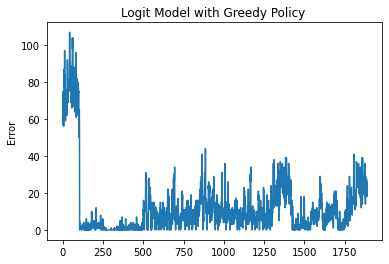

"\nplt.subplot(2, 1, 2)\nplt.plot(losses_test)\nplt.xlabel('Test Plot')\nplt.ylabel('MSE')\n"

In [13]:
#print (rewards_list)
plt.plot(rewards_list)
plt.ylabel('Error')
plt.title('Logit Model with Greedy Policy ')
plt.show()

"""
plt.subplot(2, 1, 2)
plt.plot(losses_test)
plt.xlabel('Test Plot')
plt.ylabel('MSE')
"""

In [14]:
import pickle

with open('../losses_list_greedy', 'wb') as fp:
    pickle.dump(losses_list, fp)
#To read it back:

 

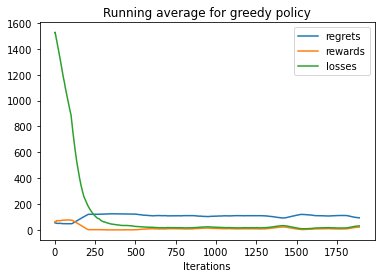

In [15]:
with open ('../losses_list_greedy', 'rb') as fp:
    itemlist_greedy = pickle.load(fp)
with open ('../losses_list_egreedy', 'rb') as fp:
    itemlist_egreedy = pickle.load(fp)

def plot_learning_curve(x, scores, figure_file='test'):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average for greedy policy')
    #plt.savefig(figure_file)
    
x = [i+1 for i in range(944*2)]
plot_learning_curve(x, regrets_list)
plot_learning_curve(x, rewards_list)
plot_learning_curve(x, losses_list)
plt.legend(['regrets', 'rewards','losses'], loc='upper right');
plt.xlabel('Iterations');

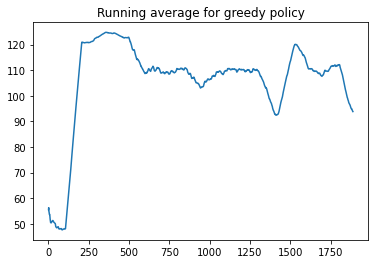

In [16]:
plot_learning_curve(x, regrets_list)

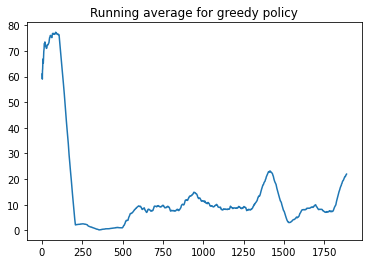

In [17]:
plot_learning_curve(x, rewards_list)

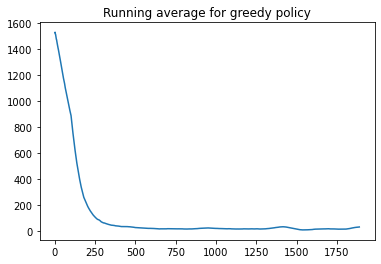

In [18]:
plot_learning_curve(x, losses_list)